# Amazon Alexa Reviews Classification

# Setting the Objective

The objective is to discover insights on consumer reviews and perform sentiment analysis. <br>
Now let's start with importing the libraries, loading the data and have a quick look on the data.


# Importing the Data

import libraries 

In [1]:
import pandas as pd # data manipulation using dataframes
import numpy as np # statistical analysis 
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization

loading the data

In [2]:
amazon_df = pd.read_csv('amazon_alexa.tsv', sep='\t')

A quick look on the first rows of data

In [3]:
amazon_df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


And a look on the last rows of data

In [4]:
amazon_df.tail()

,rating,date,variation,verified_reviews,feedback
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1
3149,4,29-Jul-18,Black Dot,Good,1


Verified reviews column is the pillar of our analysis, let's read some reviews

In [5]:
amazon_df['verified_reviews'].head(15)

0                                         Love my Echo!
1                                             Loved it!
2     Sometimes while playing a game, you can answer...
3     I have had a lot of fun with this thing. My 4 ...
4                                                 Music
5     I received the echo as a gift. I needed anothe...
6     Without having a cellphone, I cannot use many ...
7     I think this is the 5th one I've purchased. I'...
8                                           looks great
9     Love it! I’ve listened to songs I haven’t hear...
10    I sent it to my 85 year old Dad, and he talks ...
11    I love it! Learning knew things with it eveyda...
12    I purchased this for my mother who is having k...
13                                   Love, Love, Love!!
14                             Just what I expected....
Name: verified_reviews, dtype: object

# Visualizing the Data

In [6]:
# creating datasets of positive and negative feedbacks
positive = amazon_df[amazon_df['feedback']==1]
negative = amazon_df[amazon_df['feedback']==0]

Let's see some negative feedbacks

In [7]:
print("There are "+ str(len(negative)) + " negative feedbacks: ")
negative["verified_reviews"].head(15)

There are 257 negative feedbacks: 


46     It's like Siri, in fact, Siri answers more acc...
111    Sound is terrible if u want good music too get...
141                                   Not much features.
162    Stopped working after 2 weeks ,didn't follow c...
176                                 Sad joke. Worthless.
187    Really disappointed Alexa has to be plug-in to...
205    It's got great sound and bass but it doesn't w...
233    I am not super impressed with Alexa. When my P...
299    Too difficult to set up.  It keeps timing out ...
341                               Alexa hardly came on..
350    Item no longer works after just 5 months of us...
361    This thing barely works. You have to select 3r...
368    I returned 2 Echo Dots & am only getting refun...
369                                          not working
373            I'm an Echo fan but this one did not work
Name: verified_reviews, dtype: object

Let's see the counts of feedbacks on a bar graph

There are 257 negative feedbacks: 
There are 2893 positive feedbacks: 


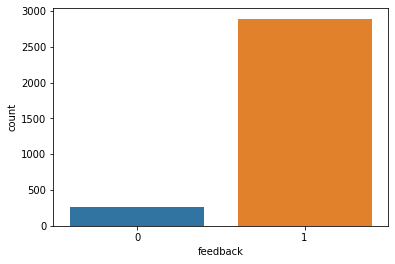

In [8]:
sns.countplot(amazon_df['feedback'], label = "Count") 
print("There are "+ str(len(negative)) + " negative feedbacks: ")
print("There are "+ str(len(positive)) + " positive feedbacks: ")

Now we check the ratings similarly

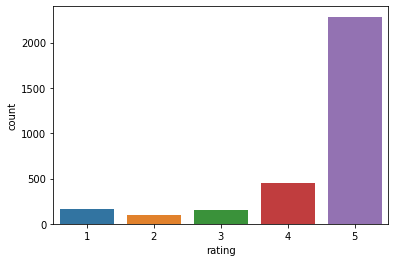

In [9]:
sns.countplot(x = 'rating', data = amazon_df)
plt.show()

# Feature Engineering

We will not work  on the ratings and dates, we will focus on the reviews <br>
We drop those columns

In [10]:
amazon_df = amazon_df.drop(['date', 'rating'],axis=1)
amazon_df.head()

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1


Next we make dummies of the categorical variable "variation" <br>
We use "drop_first" to cope with the multi-collinearity trap (one value can be predicted from the other values)

In [11]:
variation_dummies = pd.get_dummies(amazon_df['variation'], drop_first = True)

Now we replace the categorical column with the dummies

In [12]:
amazon_df.drop(['variation'], axis=1, inplace=True)
amazon_df = pd.concat([amazon_df, variation_dummies], axis=1)
amazon_df.head()

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Music,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


Now, since we will work with reviews, we also need to vectorize them <br>
Which means transforming text to dummies <br>
We need this to train a model on reviews <br>
<br>
We will use the TfidfVectorizer class<br> 
This class takes tfidf measure for each word in each row <br>
Tfidf is abbrevation of __term frequency–inverse document frequency__ <br>
Term frequency stands for occurance of the word in the instance <br>
IDF stands for the inverse of the total occurance of the word in the whole document <br>
Both is necesarry, since we also want to know if our word is common word or not by measuring the IDF


In [13]:
#We import the library needed to the transformation

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
amazon_countvectorizer = vectorizer.fit_transform(amazon_df['verified_reviews'])


When we look at the shape of our vectorized reviews:

In [14]:
amazon_countvectorizer.shape

(3150, 4044)

We see that we now have over 4000 columns <br>
Which is not practical to train a model for nearly 3000 instances <br>
We will come to that, but first let's see what CountVectorizer has actually done <br>
<br>
We print some of the names of those 4000 columns:


In [15]:
print(vectorizer.get_feature_names()[1000:1200])

['details', 'detect', 'determined', 'developed', 'developers', 'development', 'device', 'deviceoverall', 'devices', 'devise', 'devises', 'dhiw', 'diagnostics', 'dial', 'dictionary', 'did', 'didn', 'didnt', 'died', 'dies', 'differ', 'difference', 'differences', 'different', 'differentiate', 'difficult', 'difficulty', 'dig', 'digital', 'digitol', 'digs', 'dim', 'dimat', 'dimension', 'dimmer', 'dimming', 'dims', 'dining', 'dinner', 'dinosaurs', 'direct', 'direction', 'directions', 'directly', 'directtv', 'directv', 'disability', 'disable', 'disabled', 'disagree', 'disappoint', 'disappointed', 'disappointing', 'disappointment', 'disappointments', 'disarm', 'disaster', 'disconcerting', 'disconnect', 'disconnected', 'disconnecting', 'disconnections', 'disconnects', 'discount', 'discounts', 'discourage', 'discover', 'discovered', 'discoveredthat', 'discovering', 'discovery', 'dish', 'dislike', 'dislikes', 'dismiss', 'dismissed', 'display', 'displayed', 'displaying', 'displays', 'disposable', 

These features simply represent each word occured in the reviews <br>
For each row, corresponding value means the number of occurance of that word in that review

We still have more columns than we have rows. <br>
This is not a healthy situation, since having too many columns compared to rows will hinder the learning algorithm, <br> or overfit the train data so much. <br>
<br>
So now, we have to select some of those columns and drop the remaining.<br>
For start, we can drop the words appearing in less than 15 records by setting min_df parameter to 15

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=15)
amazon_countvectorizer = vectorizer.fit_transform(amazon_df['verified_reviews'])
amazon_countvectorizer.shape

(3150, 590)

We will continue droping columns <br>
But now we drop the verified_reviews columns and add the vectorized array instead

In [17]:
amazon_df.drop(['verified_reviews'], axis=1, inplace=True)
reviews = pd.DataFrame(amazon_countvectorizer.toarray())
amazon_df = pd.concat([amazon_df, reviews], axis=1)
amazon_df.head(10)

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,...,580,581,582,583,584,585,586,587,588,589
0,1,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
1,1,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.235067,0.0,0.000000,0.366870,0.0,0.0
3,1,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
4,1,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
5,1,0,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
6,1,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.136074,0.085792,0.0,0.0
7,1,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
8,1,0,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
9,1,0,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0


We now assign feedback column to **y** and all other columns to __X__

In [18]:
y = amazon_df['feedback']
X = amazon_df.drop(['feedback'],axis=1)
X.shape

(3150, 605)

Now we have a training set of 600 columns, we can use chi-square test to get the most correlated 100 columns <br>
We will do that by using the __SelectKBest__ method of sklearn

In [19]:
from sklearn.feature_selection import SelectKBest, chi2
X = SelectKBest(chi2, k=100).fit_transform(X, y)
X.shape

(3150, 100)

# Training the Model

We start the modelling by splitting the datasets to train and test sets

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

We now import the classes to be used during the training and evaluating the model

In [21]:
# we will use classification_report and confusion_matrix in evaluation
from sklearn.metrics import classification_report, confusion_matrix

# remember the random forest is an ensemble learning algorithm:
from sklearn.ensemble import RandomForestClassifier

We will now define the classifier <br>
We want 200 trees so n_estimators = 200 <br>
We will train the trees according to the entropy criteria <br>
The [entropy](https://www.bogotobogo.com/python/scikit-learn/scikt_machine_learning_Decision_Tree_Learning_Informatioin_Gain_IG_Impurity_Entropy_Gini_Classification_Error.php) is 0 if all samples of a node belong to the same class, <br>
and the entropy is maximal if we have a uniform class distribution


In [22]:
randomforest_classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy',random_state = 42)
randomforest_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

# Evaluating the Model

We first see how the model fits on training data:

              precision    recall  f1-score   support

           0       1.00      0.88      0.94       199
           1       0.99      1.00      1.00      2321

    accuracy                           0.99      2520
   macro avg       1.00      0.94      0.97      2520
weighted avg       0.99      0.99      0.99      2520



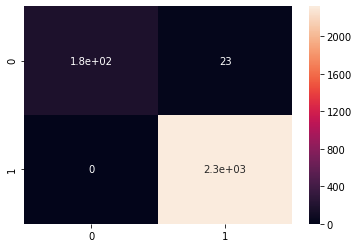

In [23]:
y_predict_train = randomforest_classifier.predict(X_train)
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)
print(classification_report(y_train, y_predict_train))

This is pretty good, but does not say much on well the data will predict on an unseen data <br>
Because we used a very strong ensemble algortihm over a numerous of columns <br>
So, with those in hand, fitting on a known data is not a success <br>
<br>
We have to see the performance on the test data

              precision    recall  f1-score   support

           0       0.83      0.33      0.47        58
           1       0.94      0.99      0.96       572

    accuracy                           0.93       630
   macro avg       0.88      0.66      0.72       630
weighted avg       0.93      0.93      0.92       630



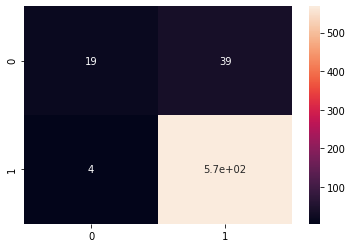

In [24]:
y_predict = randomforest_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predict))

Even though the accuracy is somehow high, we spot the recall for class 0 is miserably low <br>
We have to improve the model to cope with that problem <br>
Otherwise, we are missing the negative feedbacks, which are obviously more important than the positive ones

# Improving the Model

Hyper-parameter tuning: <br> <br>
To improve the model, we will tune the hyper-parameters to search for a better fitting <br>
By using the random search, we will narrow the parameter ranges to look for, <br> 
Then, we will use the grid search to search through narrowed values for parameters and detect the best fitting values <br> <br>
But, a good fit might occur by chance since the training set is randomly picked <br>
To avoid it, we will use Cross Validation <br>

We start by listing the parameters used in the model

In [25]:
randomforest_classifier.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

From the article [Hyperparameter Tuning the Random Forest in Python](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74), we use the parameters list below as our tuning parameters:

- n_estimators = number of trees in the foreset
- max_features = max number of features considered for splitting a node
- max_depth = max number of levels in each decision tree
- min_samples_split = min number of data points placed in a node before the node is split
- min_samples_leaf = min number of data points allowed in a leaf node
- bootstrap = method for sampling data points (with or without replacement)

In [26]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


The algorithm will run over difference combinations of the features. <br>
In total, there aree 10 * 2 * 12 * 3 * 3 * 2 = 4320 runs <br>
But random search does not try every combiantion, <br>
but selecting at random to sample a wide range of values. <br> 
[see more](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74)

In [27]:
randomforest_classifier = RandomForestClassifier(random_state = 42)

randomforest_random = RandomizedSearchCV(estimator = randomforest_classifier, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

randomforest_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.9min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

Below is the best parameters:

In [28]:
randomforest_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': True}

We fit with those parameters to see if there is an improvement

              precision    recall  f1-score   support

           0       0.83      0.34      0.49        58
           1       0.94      0.99      0.96       572

    accuracy                           0.93       630
   macro avg       0.89      0.67      0.73       630
weighted avg       0.93      0.93      0.92       630



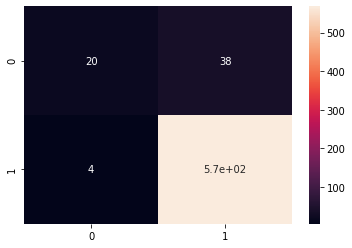

In [29]:
y_predict = randomforest_random.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predict))

There is not an improvement in recall for class 0 <br>
but that is expected since the data is highly imbalanced. <br>
There are several things worth trying to deal with imbalanced classes <br>
<br>
One is bootstraping the rare class and increase its representation in the model <br>
We will weight the classes to do so <br>
<br>
There are 257 negative feedbacks and 2893 positive feedbacks: 2893 / 257 ~ 11  <br>
We will roughly weight them 10 to 1
<br>
This time we will use AUC (area under curve) scoring to have a better estimate for both classes

In [30]:
from sklearn.metrics import make_scorer, roc_auc_score
auc = make_scorer(roc_auc_score)

In [31]:
randomforest_classifier = RandomForestClassifier(random_state = 42, class_weight={0:10,1:1})

randomforest_random = RandomizedSearchCV(estimator = randomforest_classifier, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1, scoring = auc)

randomforest_random.fit(X_train, y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.1min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight={0: 10, 1: 1},
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_

              precision    recall  f1-score   support

           0       0.49      0.74      0.59        58
           1       0.97      0.92      0.95       572

    accuracy                           0.91       630
   macro avg       0.73      0.83      0.77       630
weighted avg       0.93      0.91      0.91       630



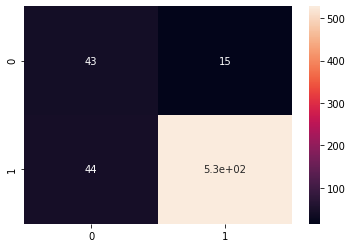

In [32]:
y_predict = randomforest_random.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predict))

Now, after adding class weights, we have a better recall for the class 0<br>
Class 0 has much more importance of correctly detection than the class 1, <br>
since negative feedbacks are much more vital for the business. <br>
The pression and recall for class 0 is at level we can call somehow satisfactory <br>
<br>
Eventhough the recall for class 1 is now lesser, we can overlook that <br> since the aim of the study is to correctly clasify the negative feedbacks.